In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras import layers ,models
from tensorflow import keras

# reading and processing data 

In [2]:
IMAGE_SIZE= 256
BATCH_SIZE= 32

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("D:\plantvillage dataset\color",
 shuffle = True,
 image_size =(256, 256),
 batch_size= 32                                                 
)

Found 19341 files belonging to 20 classes.


In [4]:
class_names= dataset.class_names
print(class_names)

['Apple___Cedar_apple_rust', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___healthy', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Early_blight', 'Tomato___Leaf_Mold', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


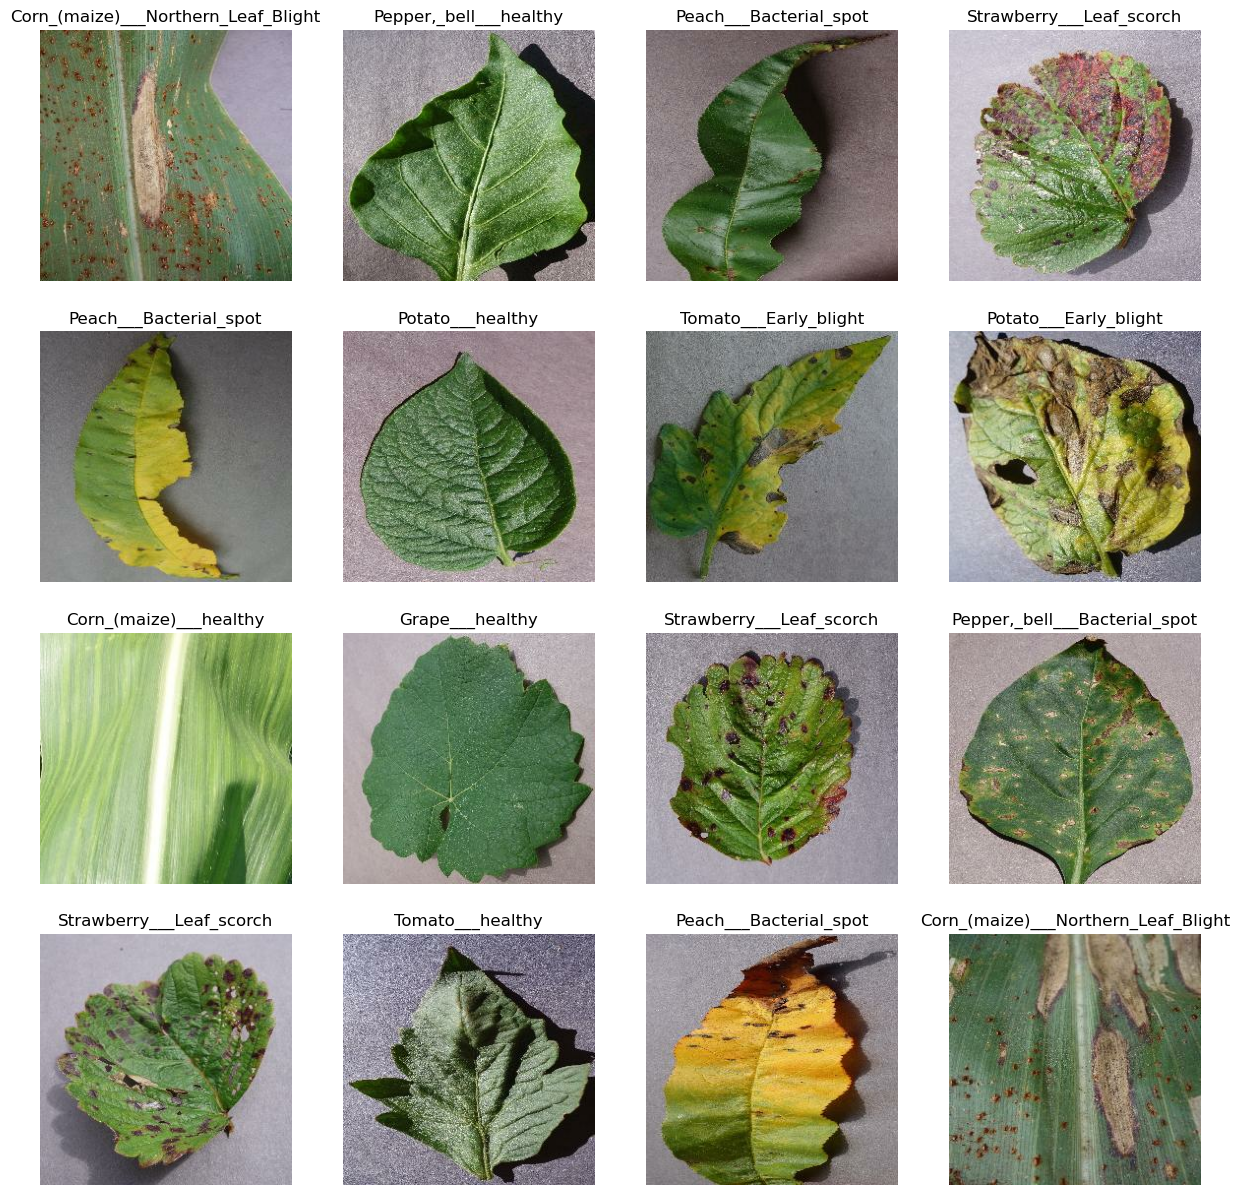

In [5]:
 plt.figure(figsize=(15,15))
for image_batch ,lable_batch in dataset.take(2):
    for i in range(16):
        xy= plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[lable_batch[i]])
        plt.axis("off")
       

In [6]:
len(dataset)

605

 dataset splitting into train ,test and validation using tensorflow 
 train=70% , validation= 20% , test=10% 

In [8]:
train_size = 0.7
val_size = 0.2
test_size = 0.1


In [15]:
def dataset_splitting(ds, train_part=0.7, val_part=0.2, test_part=0.1, shuffle=True, shuffle_size=10000):
    assert (train_part + test_part + val_part) == 1
    
    dataset_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_part * dataset_size)
    val_size = int(val_part * dataset_size)
    
    train_dataset = ds.take(train_size)    
    val_dataset = ds.skip(train_size).take(val_size)
    test_dataset = ds.skip(train_size).skip(val_size)
    
    return train_dataset, val_dataset, test_dataset

In [16]:
 train_dataset, val_dataset, test_dataset= dataset_splitting(dataset)

In [17]:
len(train_dataset)

423

In [18]:
len(test_dataset)

61

In [19]:
len(val_dataset)

121

In [20]:

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

# bulding model

In [21]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3)
n_classes = 20

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [24]:
 model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    validation_data=val_dataset,
    verbose=1,
    epochs=25
)

Epoch 1/25
423/423 [==============================] - 1454s 3s/step - loss: 1.9756 - accuracy: 0.3806 - val_loss: 0.8499 - val_accuracy: 0.7249
Epoch 2/25
423/423 [==============================] - 1495s 3s/step - loss: 0.6902 - accuracy: 0.7823 - val_loss: 0.4428 - val_accuracy: 0.8536
Epoch 3/25
423/423 [==============================] - 1487s 3s/step - loss: 0.4323 - accuracy: 0.8615 - val_loss: 0.5160 - val_accuracy: 0.8350
Epoch 4/25
423/423 [==============================] - 1446s 3s/step - loss: 0.3163 - accuracy: 0.8967 - val_loss: 0.2631 - val_accuracy: 0.9184
Epoch 5/25
423/423 [==============================] - 1419s 3s/step - loss: 0.2389 - accuracy: 0.9234 - val_loss: 0.1777 - val_accuracy: 0.9409
Epoch 6/25
423/423 [==============================] - 1399s 3s/step - loss: 0.2153 - accuracy: 0.9282 - val_loss: 0.2051 - val_accuracy: 0.9310
Epoch 7/25
423/423 [==============================] - 1404s 3s/step - loss: 0.1711 - accuracy: 0.9453 - val_loss: 0.1251 - val_accuracy:

# testing the model and predection plant disease

In [25]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 471ms/step


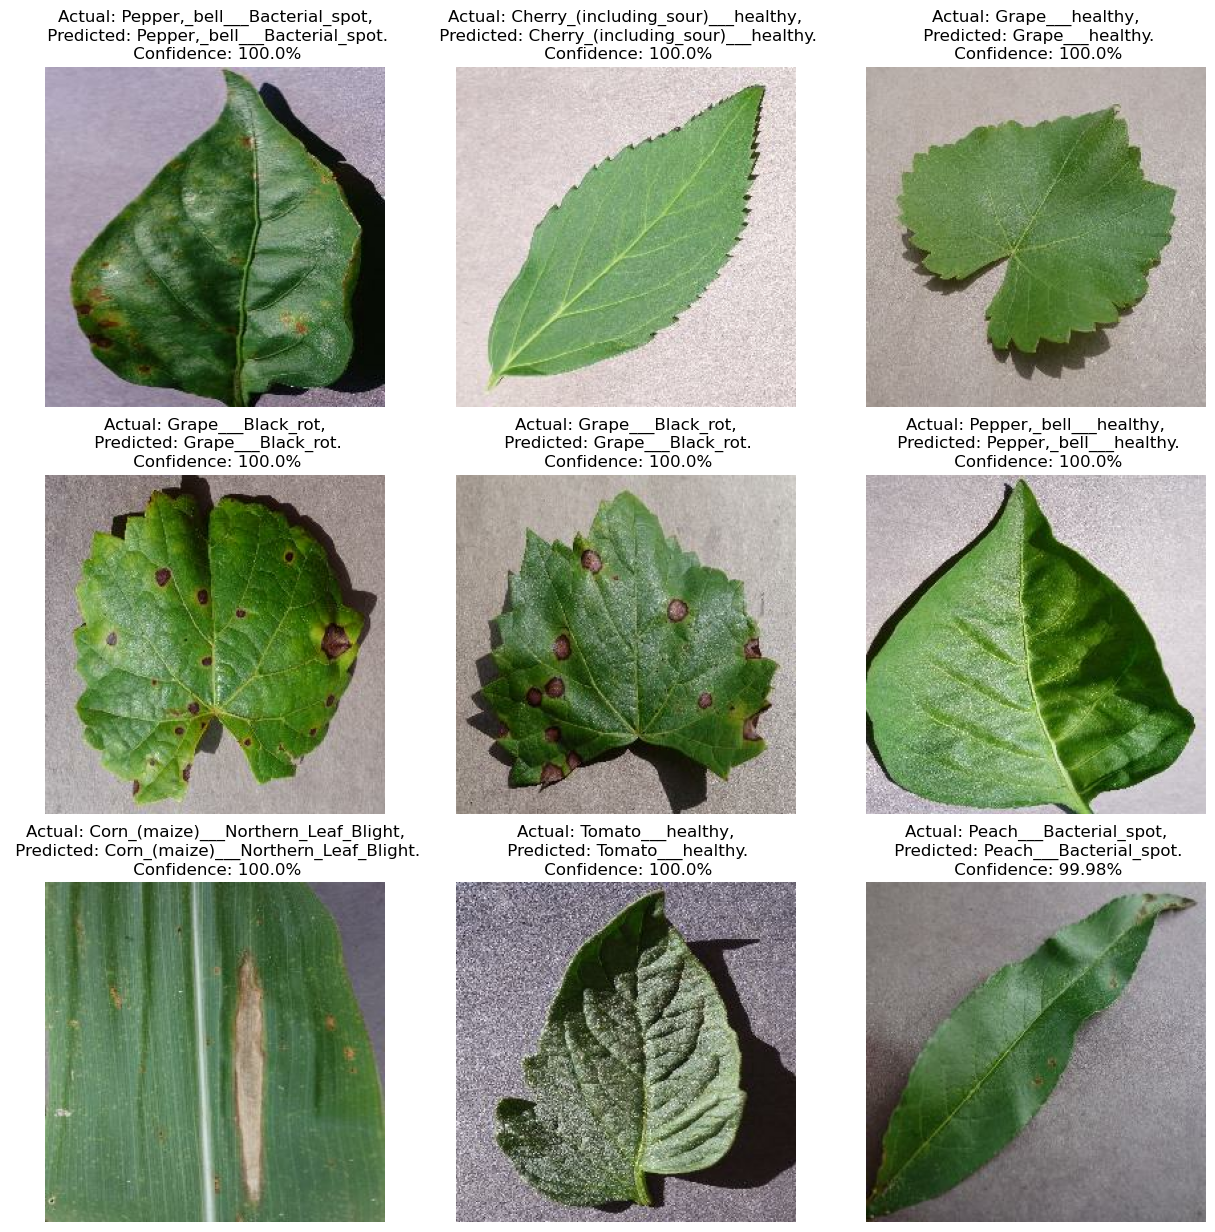

In [26]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")